**ATMOS 5020**  
**November 1, 2018**


# Introduction
Information and knowledge is often shared through visualizations. Some visualizations are better than others. Communicating data and results effectivley through figures is both a skill and an art that can be learned.

`matplotlib.pyplot` is a powerful library to make highly customizable and professional figures. It is the user's responsibility, however, to make sure the data displayed is accurate, clean, and readable.

`matplotlib` is built to work well with `numpy` arrays. If possible, convert you're data to a numpy array and you'll be in better shape.

There are two ways to generate figures with matplotlib: 
1. The _easy way_ (similar to what you will do in MatLab)
    - Calls to `plt.` will create objects when they are needed.
    - example: `plt.plot()`, `plt.xlabel`
2. The _customizable way_, which utilizes the object-oriented nature of figure objects.
    - Explicitly create figures and axes first, and then do things to the axes.
    - example: `fig, ax = plt.subplots()`, `ax.plot()`, `ax.set_xlabel()`

You will see both methods used in documentation and examples you find online. For this class, we will mostly use the _easy way_.

---

> #### References:
> Do not underestimate the usefulness of the documentation. Read them. They are written for you!
> - Introduction and Usage Guide: https://matplotlib.org/tutorials/introductory/usage.html
> - Basic matplotlib plotting (the easy way): https://matplotlib.org/tutorials/introductory/pyplot.html
> - Types of plots: https://matplotlib.org/tutorials/introductory/sample_plots.html
> - Other tutorials: https://matplotlib.org/tutorials/index.html

# 1-D plotting with `matplotlib`

Before we make a plot, we have to import the libraries we will use and then get or generate the data we want to visualize.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

[0.73314728 0.33067655 0.95158558 0.27409463 0.46923619 0.66257668
 0.75578929 0.89578011 0.47234907 0.02778671]


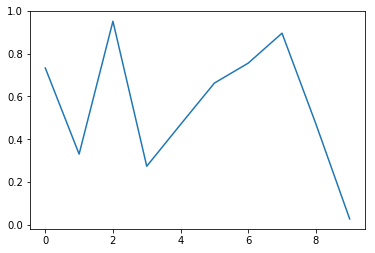

In [5]:
# Generate a vector of random data.
y = np.random.rand(10)
print(y)

# Make a simple line plot
plt.plot(y)

Rerun the above cell and see how the figure changes. Every time `np.random.rand(10)` is executed, it generates 10 random numbers between 0 and 1.

[Reference: numpy.random module](https://docs.scipy.org/doc/numpy/reference/routines.random.html)

Notice that the x values are automatically assigned based on the length of the y array. Also notice how all the data points are connected by a line.

Next, generate some x values to match with each y value and make a _scatter plot_. For a scatter plot to work, the amount of values in x an y must be the same. 

Text(0,0.5,'y value')

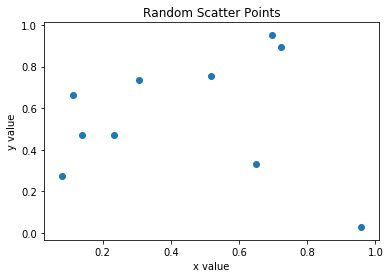

In [6]:
# Make a new vector for x with the same length as y
x = np.random.rand(len(y))

plt.scatter(x, y)

# Add some chart elements
plt.title('Random Scatter Points')
plt.xlabel('x value')
plt.ylabel('y value')

You can also overlay differnt types of plots on the same axes.

Text(0,0.5,'y value')

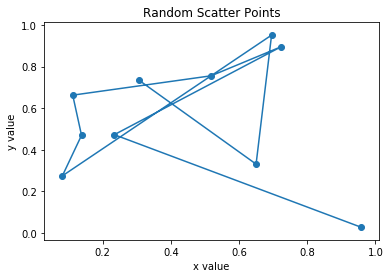

In [7]:
plt.scatter(x, y)
plt.plot(x, y)

# Add some chart elements
plt.title('Random Scatter Points')
plt.xlabel('x value')
plt.ylabel('y value')

Each figure element can be customized with different chart elements.

Look at the cell and figure below. How are different chart elements control? 

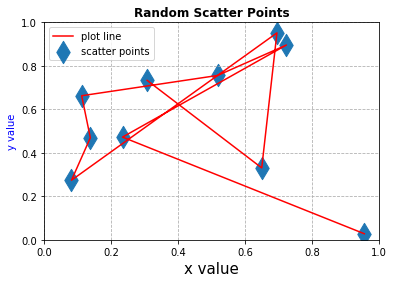

In [8]:
plt.scatter(x, y, marker='d', s=250, label='scatter points')
plt.plot(x, y, color='red', label='plot line')

# Add some chart elements
plt.title('Random Scatter Points', fontweight='bold')
plt.xlabel('x value', fontsize=15)
plt.ylabel('y value', color='blue')

plt.xlim([0, 1])
plt.ylim([0, 1])

# Legend requires the ploted data to have a `label` associated with them (see above).
plt.legend()

plt.grid(linestyle='--')

We can easily plot math functions on the same plot

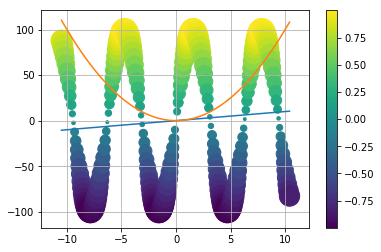

In [68]:
a = np.arange(-10.5,10.5,.1)

plt.plot(a, a)
plt.plot(a, a**2)

# Rather than assigning a single color or size to a scatter point, you can assign them to a variable.
plt.scatter(a, np.sin(a)*100, s=np.abs(np.sin(a)*500), c=np.sin(a))
plt.colorbar()

plt.grid()

Another type of figure is the bar chart. The first argument is the poistion on the x axis (0, 1, 2, 3, etc.) and the second argument is for the the height of the bar, in this case the value of `x`. 

[Reference: matplotlib bar plot[(https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html)

<BarContainer object of 10 artists>

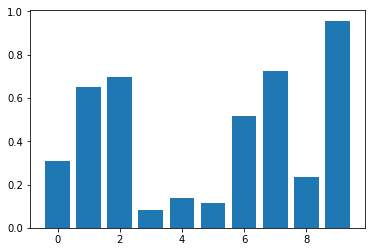

In [9]:
plt.bar(range(len(x)), x)

Text(0.5,0,'bins')

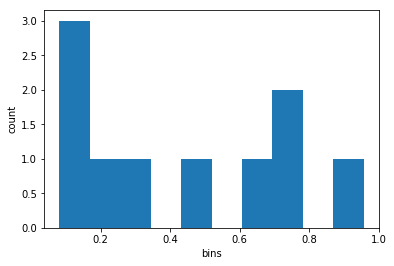

In [10]:
plt.hist(x)
plt.ylabel('count')
plt.xlabel('bins')

---

# Plotting Real 1-D Data

Ok. Lets do something a little more interesting. Load weather observations from WBB

Load five days of 1 minute weather data for the William Browning Building (WBB) on the UofU campus and the Salt Lake International Airport (KSLC).
- [mesowest download page](https://mesowest.utah.edu/cgi-bin/droman/download_api2.cgi?stn=KSLC&year1=2018&day1=16&month1=10&hour1=17&timetype=LOCAL&unit=0)

In [25]:
station_id = np.genfromtxt('./data/WBB.csv', skip_header=8, delimiter=',', usecols=0, dtype=str)
dates = np.genfromtxt('./data/WBB.csv', skip_header=8, delimiter=',', usecols=1, dtype=str)
temperature = np.genfromtxt('./data/WBB.csv', skip_header=8, delimiter=',', usecols=2)
relative_humidity = np.genfromtxt('./data/WBB.csv', skip_header=8, delimiter=',', usecols=3)

Open the `.csv` file to see the column contents and the units.

- The 0th column is the Station ID
- The 1st column is the Date
- The 2nd column is the temperature in Celsius
- The 3rd column is the relative humidity in percent
- The 4th column is the wind speed in meters per second
- The 5th column is the wind direction in degrees

In [26]:
relative_humidity

array([53.36, 52.37, 52.9 , ..., 33.95, 34.51, 34.89])

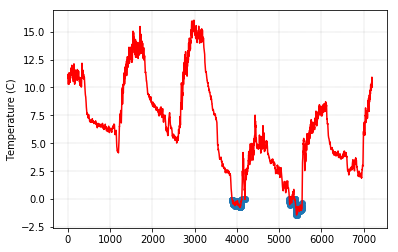

In [86]:
plt.plot(temperature, color='red')

plt.ylabel('Temperature (C)')

plt.grid(linestyle='--', color='grey', linewidth=.2)

# Highlight the points where temperature dropped below 0 degrees Celsius.
plt.scatter(np.argwhere(temperature<0), temperature[np.argwhere(temperature<0)])

This is nice, but we would really like to see the correct date on the x axis.

But`dates` is a list of strings. It would be really nice to convert those to dates. Fortunatly, Python has some built-in tools for converting strings to datetime objects

In [29]:
from datetime import datetime

In [18]:
formated_dates = np.array([datetime.strptime(i, '%m/%d/%Y %H:%M MDT') for i in dates])

In [20]:
print(formated_dates)
print(dates)

[datetime.datetime(2018, 10, 11, 12, 0)
 datetime.datetime(2018, 10, 11, 12, 1)
 datetime.datetime(2018, 10, 11, 12, 2) ...
 datetime.datetime(2018, 10, 16, 11, 58)
 datetime.datetime(2018, 10, 16, 11, 59)
 datetime.datetime(2018, 10, 16, 12, 0)]
['10/11/2018 12:00 MDT' '10/11/2018 12:01 MDT' '10/11/2018 12:02 MDT' ...
 '10/16/2018 11:58 MDT' '10/16/2018 11:59 MDT' '10/16/2018 12:00 MDT']


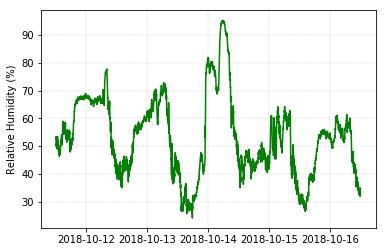

In [22]:
plt.plot(formated_dates, relative_humidity, color='green')

plt.ylabel('Relative Humidity (%)')

plt.grid(linestyle='--', color='grey', linewidth=.2)

In [42]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)
x = np.random.uniform(0,1,1000)
y = np.random.normal(0,1,1000)

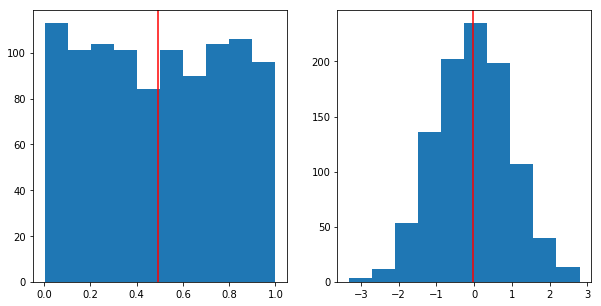

In [43]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

ax1.hist(x)
ax1.axvline(x.mean(), color='red')

ax2.hist(y)
ax2.axvline(y.mean(), color='red')